In [ ]:
!pip install PyPDF2

     |████████████████████████████████| 81kB 5.0MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61085 sha256=57ee6f13f14d0d1dfa6516ca438988b2d2d6807ee12ed456bae5de385af1023c
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [ ]:
import PyPDF2
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher


In [ ]:
# mypath='/content/drive/My Drive/Colab Notebooks/ResumeNLP' #enter your path here where you saved the resumes
# onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
mypath='/content/drive/My Drive/Colab Notebooks/interns/Vakul Resume - MANOJ KUMART.pdf' #enter your path here where you saved the resumes
# onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
def pdfextract(file):
    fileReader = PyPDF2.PdfFileReader(open(file,'rb'))
    countpage = fileReader.getNumPages()
    count = 0
    text = []
    while count < countpage:    
        pageObj = fileReader.getPage(count)
        count +=1
        t = pageObj.extractText()
        print (t)
        text.append(t)
    return text

In [ ]:
Counter(d).items()

NameError: ignored

In [ ]:
doc=nlp(" sentiment sentiment.")
for token in doc:
  if(token.text=='sentiment'):
    print("true")

true
true


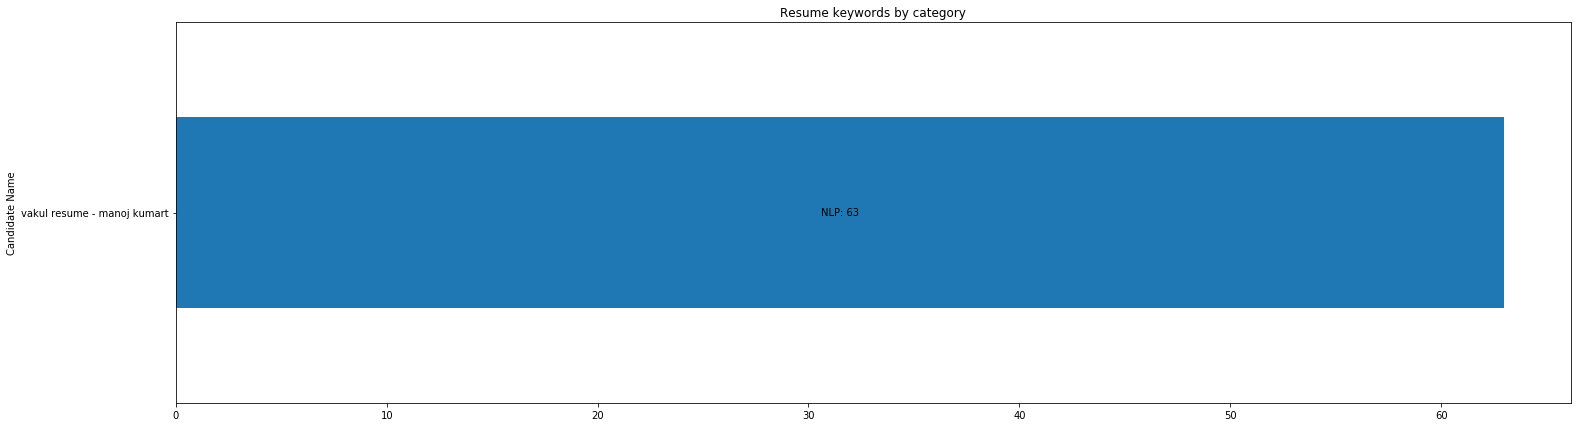

In [ ]:
mypath='/content/drive/My Drive/interns/Vakul Resume - MANOJ KUMART.pdf' #enter your path here where you saved the resumes

# onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

def pdfextract(file):
    # print(file)
    fileReader = PyPDF2.PdfFileReader(open(file,'rb'))
    countpage = fileReader.getNumPages()
    count = 0
    text = []
    while count < countpage:    
        pageObj = fileReader.getPage(count)
        count +=1
        t = pageObj.extractText()
        # print (t)
        text.append(t)
    return text
def create_profile(file):
    text = pdfextract(file) 
    text = str(text)
    text = text.replace("\\n", " ")
    text = text.lower()
    #below is the csv where we have all the keywords, you can customize your own

    keyword_dict = pd.read_csv('/content/drive/My Drive/Skill Table - Sheet1.csv')
    stats_words = [nlp(text) for text in keyword_dict['STATISTICS'].dropna(axis = 0)]
    NLP_words = [nlp(text) for text in keyword_dict['NLP'].dropna(axis = 0)]
    ML_words = [nlp(text) for text in keyword_dict['MACHINE LEARNING'].dropna(axis = 0)]
    DL_words = [nlp(text) for text in keyword_dict['DEEP LEARNING'].dropna(axis = 0)]
    R_words = [nlp(text) for text in keyword_dict['R LANGUAGE'].dropna(axis = 0)]
    python_words = [nlp(text) for text in keyword_dict['PYTHON LANGUAGE'].dropna(axis = 0)]
    Data_Engineering_words = [nlp(text) for text in keyword_dict['DATA ENGINEERING'].dropna(axis = 0)]
    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats_words)
    matcher.add('NLP', None, *NLP_words)
    matcher.add('ML', None, *ML_words)
    matcher.add('DL', None, *DL_words)
    matcher.add('R', None, *R_words)
    matcher.add('Python', None, *python_words)
    matcher.add('DE', None, *Data_Engineering_words)
    doc = nlp(text)
    d = []  
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
        span = doc[start : end]  # get the matched slice of the doc
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())

    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))

    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
        
    name = filename.split('_')
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])

    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)
    return dataf


final_database=pd.DataFrame()
i = 0 
while i < len(mypath):
    file = mypath
    try:
        dat = create_profile(file)
    except:
        print("skipped file:", file)
        continue
    final_database = final_database.append(dat)
    i +=1
    # print(final_database)

    
#code to count words under each category and visulaize it through Matplotlib

final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], final_database['Subject']]).count().unstack()
final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']
#execute the below line if you want to see the candidate profile in a csv format
sample2=new_data.to_csv('sample.csv')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
ax = new_data.plot.barh(title="Resume keywords by category", legend=False, figsize=(25,7), stacked=True)
labels = []
for j in new_data.columns:
    for i in new_data.index:
        label = str(j)+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
plt.show()
            



In [ ]:
final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], final_database['Subject']]).count().unstack()
final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']

In [ ]:
final_database['Subject']

0    NLP
0    NLP
0    NLP
0    NLP
0    NLP
    ... 
0    NLP
0    NLP
0    NLP
0    NLP
0    NLP
Name: Subject, Length: 63, dtype: object

In [ ]:
 final_database

,Candidate Name,Subject,Keyword,Count
0,vakul resume - manoj kumart,NLP,chatbot,1
0,vakul resume - manoj kumart,NLP,chatbot,1
0,vakul resume - manoj kumart,NLP,chatbot,1
0,vakul resume - manoj kumart,NLP,chatbot,1
0,vakul resume - manoj kumart,NLP,chatbot,1
...,...,...,...,...
0,vakul resume - manoj kumart,NLP,chatbot,1
0,vakul resume - manoj kumart,NLP,chatbot,1
0,vakul resume - manoj kumart,NLP,chatbot,1
0,vakul resume - manoj kumart,NLP,chatbot,1
